In [1]:
import sys
sys.path.append('..')
import nbimport 
nbimport.initialize()

In [2]:
from Stat_13 import *
css_styling()

# Confidence intervals 

# Tillidsintervaller

## Purpose

- To familiarise ourselves with the idea of [_confidence intervals_](https://en.wikipedia.org/wiki/Confidence_interval).
- To see how we can compute confidence intervals 

## Formål

- At gøre os bekendt med ideen om [_tillidsintervaller_](https://da.wikipedia.org/wiki/Confidence_interval) (engl. _confidence intervals_).
- For at se, hvordan vi kan beregne tillidsintervaller

## Introduction 

Often we see results quoted as

$$\hat{x} = x_{-(x-a)}^{+(b-x)}\quad\text{(at $95\%$ C.L.)}\quad.$$

Here, we will investigate just exactly what we mean by "at $95\%$ C.L.". 

Suppose some random variable is distributed according to some PDF $f$.  Then 

$$p=\int_{a}^{b}\mathrm{d}x\,f(x) = F(b) - F(a)\quad,$$ 

where $F$ is the cumulative density function (CDF), expresses the probability $p$ of finding $x\in[a,b]$.  Thus, we can say 

> With probability $p$ we are confident that $x$ will fall in the interval $[a,b]$. 

This is exactly what we mean by the $p$ confidence interval:  The interval $[a,b]$ such that the probability of finding $x$ in that interval is $p$. 

Note, there is an inherent assumption that the chosen PDF is the correct PDF - which we of course cannot determine directly.  We can do hypothesis testing (see [here](#More-about-hypothesis-testing)) to rule out certain hypotheses but we can not confirm that a hypothesis is _correct_. 

Sometimes, we will see results such as 

$$m > M\quad\text{(at $95\%$ C.L.)}\quad,$$

or 

$$m < M\quad\text{(at $95\%$ C.L.)}\quad.$$

What this means is that we have taken $b$ and $a$ to the upper and lower bound of the domain of the PDF, respectively, typically $b=\infty$ and $a=\infty$, and the other end-point at $m$. For example

\begin{align*}
  p &= \int_{m}^{\infty}\mathrm{d}x\,f(x) &\text{for}\quad m &> M && \text{lower limit}\\
  p &= \int_{-\infty}^{m}\mathrm{d}x\,f(x) &\text{for}\quad m &< M && \text{upper limit}
  \quad.
\end{align*}
  
In words, this means 

> With probability $p$ we are confident that $m$ is larger (smaller) than $M$.

That is, _lower_ and _upper_ limits, respectively. 

## Introduktion

Vi ser ofte resultater, der er citeret som

$$\hat{x} = x_{-(x-a)}^{+(b-x)}\quad\text{(at $95\%$ C.L.)}\quad.$$

Her vil vi undersøge nøjagtigt, hvad vi mener med "ved $95\%$ C.L.".

Antag, at en vilkårlig variabel fordelt i henhold til en PDF-$f$. Så

$$p=\int_{a}^{b}\mathrm{d}x\,f(x) = F(b) - F(a)\quad,$$

hvor $F$ er den kumulative fordeling (CDF), udtrykker sandsynlighede $p$ for at finde $x\in[a,b]$. Således kan vi sige

> Med sandsynlighed $p$ har vi tillid til at $x$ falder i intervallet $[a,b]$.

Dette er nøjagtigt, hvad vi mener med $p$-tillidsintervallet: Intervallet $[a,b]$ således, at sandsynligheden for at finde $x$ i dette interval er $p$.

Bemærk, den iboende antagelse om, at den valgte PDF er den rigtige PDF - hvilket vi selvfølgelig ikke kan bestemme direkte. Vi kan udføre hypotese-test (se [her](#Mere-om-hypotesetest)) for at udelukke visse hypoteser, men vi kan ikke bekræfte, at en hypotese er _korrekt_.

Nogle gange vil vi se resultater som f.eks

$$m > M\quad\text{(at $95\%$ C.L.)}\quad,$$

eller

$$m < M\quad\text{(at $95\%$ C.L.)}\quad.$$

Hvad dette betyder, er, at vi har taget $b$ og $a$ til henholdsvis den øvre og nedre grænse af PDF-domænet, typisk $b=\infty$ og $a=\infty$, og det andet slutpunkt til $m$. For eksempel

\begin{align*}
  p &= \int_{m}^{\infty}\mathrm{d}x\,f(x) &\text{for}\quad m &> M && \text{lower limit}\\
  p &= \int_{-\infty}^{m}\mathrm{d}x\,f(x) &\text{for}\quad m &< M && \text{upper limit}
  \quad.
\end{align*}
  
Med ord betyder det

> Med sandsynlighed $p$ har vi tillid til at $m$ er større (mindre) end $M$.

Det er altså henholdvis en _nedre_ og _øvre_ grænse. 

We have already seen confidence limits in action.  For example, when we evaluate the $p$-value of a given $\chi^2$ at some number of degrees of freedom $\nu$, we have evaluating 

$$p = \int_{\chi^2}^{\infty}\mathrm{d}\psi\,f_{\chi^2}(\psi,\nu)\quad,$$ 

where $f_{\chi^2}$ is the probability density function of $\chi^2$ at some $\nu$.  Thus, when we quote a $p$-value of a $\chi^2$, we are really quoting the _lower_ confidence limit of the found $\chi^2$.  That is, we are saying 

> With probability $p$, we are confident that $\chi^2$ at the given $\nu$ is the same or _larger_. 

It is easy to see why we prefer a $p$-value of $50\%$ for $\chi^2$ - we claim there are equal probability of finding a larger or smaller value of $\chi^2$. 

Vi har allerede set tillidsgrænser. For eksempel, når vi vurderer $p$-værdien af et given $\chi^2$ ved et antal antal frihedsgrader $\nu$, har vi evalueret

$$p = \int_{\chi^2}^{\infty}\mathrm{d}\psi\,f_{\chi^2}(\psi,\nu)\quad,$$

hvor $f_{\chi^2}$ er sandsynlighedsfordelingen af $\chi^2$ ved et $\nu$. Når vi citerer en $p$-værdi af en $\chi^2$, citerer vi virkelig den _nedre_ tillidsgrænse for den fundne $\chi^2$. Det vi siger er

> Med sandsynlighed $p$ er vi har vi tillid til at $\chi^2$ ved den givne $\nu$ er den samme eller _større_.

Det er let at se, hvorfor vi foretrækker en $p$-værdi af $50\%$ til $\chi^2$ - vi hævder, at der er lige sandsynlighed for at finde en større eller mindre værdi af $\chi^2$.

### Example: Normal distribution - $\mathcal{N}[\mu,1]$

Suppose we have a true distribution of some observable $\theta$ given by a normal distribution 

$$f(\theta;\mu\sigma) = \frac{1}{\sqrt{2\pi}\sigma}e^{-\frac12\left(\frac{\theta-\mu}{\sigma}\right)^2}\quad,$$ 

where $\mu$ is the mean and $\sigma^2$ the variance.   Without loss of generality we will set $\sigma=1$ below, and begin by considering the case $\mu=0$.  First, we see that the distribution is indeed normalised over $\mathbb{R}$

### Eksempel: Normal fordeling - $\mathcal{N}[\mu,1]$

Antag, at vi har en sand fordeling af noget observerbar $\theta$, der er givet ved en normal distribution

$$f(\theta;\mu\sigma) = \frac{1}{\sqrt{2\pi}\sigma}e^{-\frac12\left(\frac{\theta-\mu}{\sigma}\right)^2}\quad,$$

hvor $\mu$ er middelværdien og $\sigma^2$ variansen. Uden tab af generelitet vil vi nedenunder sætte $\sigma=1$ og begynde med at overveje tilfældet $\mu=0$. Først ser vi, at fordelingen faktisk er normaliseret over $\mathbb{R}$

In [3]:
from sympy import symbols, exp as syexp, sqrt as sysqrt, pi as sypi, S, oo, Integral, Eq

theta, mu = symbols('theta mu',real=True)
sigma     = symbols('sigma',real=True,positive=True)
g         = 1/(sysqrt(2*sypi)*sigma)*syexp(-S.Half*((theta-mu)/sigma)**2)
f         = g.subs({mu:S.Zero,sigma:S.One})
i         = Integral(f,(theta,-oo,oo))
Eq(i,i.doit())

Eq(Integral(sqrt(2)*exp(-theta**2/2)/(2*sqrt(pi)), (theta, -oo, oo)), 1)

Next, we consider the $p$ _central_ confidence band defined as 

$$\int_{a}^{b}d\theta\,f(\theta) = p\quad.$$ 

Since $f$ is obviously symmetric around 0, we set $b=-a$.  Thus we want to find $c>0$ such that 

$$\int_{-c}^{+c}d\theta\,f(\theta) = p\quad.$$

Dernæst overvejer vi det $p$ _centrale_ tillidsbånd defineret ved

$$\int_{a}^{b}d\theta\,f(\theta) = p\quad.$$

Da $f$ er symmetrisk omkring 0, sætter vi $b=-a$. Således ønsker vi at finde $c>0$ sådan at

$$\int_{-c}^{+c}d\theta\,f(\theta) = p\quad.$$

In [4]:
from sympy import solve 

c,p = symbols('c,p',real=True,positive=True)
ic  = f.integrate((theta,-c,c))
sc  = solve(ic-p,c)[0]
Eq(c,sc)

Eq(c, sqrt(2)*erfinv(p))

Here, $\operatorname{erfinv}$ is the [_inverse error function_](https://en.wikipedia.org/wiki/Error_function#Inverse_functions) given 

$$\operatorname{erfinv}(\operatorname{erf}(x)) = x\quad,$$ 

and where 

$$\operatorname{erf}(x) = \frac{1}{\pi}\int_{-x}^{x}\mathrm{d}t\,e^{-t^2}\quad.$$ 

Let us plot this function 

Her er $\operatorname{erfinv}$ den [_inverse fejlfunktion_](https://en.wikipedia.org/wiki/Error_function#Inverse_functions) givet

$$\operatorname{erfinv}(\operatorname{erf}(x)) = x\quad,$$

hvor

$$\operatorname{erf}(x) = \frac{1}{\pi}\int_{-x}^{x}\mathrm{d}t\,e^{-t^2}\quad.$$

Lad os plot denne funktion

The inverse error function $\sqrt{2}\operatorname{erfinv}=\sqrt{2}\operatorname{erf}^{-1}$ describing the confidence interval $\pm c$ at a given confidence level $p$ for a normal distribution with $\mu=0$ and $\sigma=1$. 

Den inverse fejlfunktion $\sqrt{2}\operatorname{erfinv}=\sqrt{2}\operatorname{erf}^{-1}$, der beskriver tillidsintervallet $\pm c$ vet et givet tillidsniveau $p$ for en normal fordeling med $\mu=0$ og $\sigma=1$.

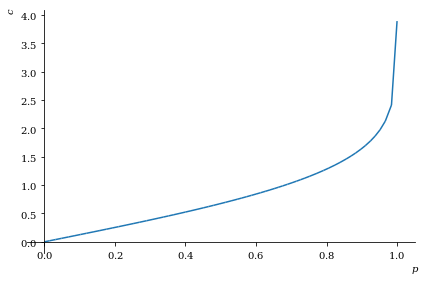

In [5]:
from sympy import plot as syplot
pl = syplot(sc,(p,0,.9999),ylabel=r'$c$',xlabel=r'$p$')

With this result, we can directly evaluate, for a given $p$ what $c$ we should choose

Med dette resultat kan vi direkte evaluere, for en given $p$, hvilket $c$ vi skal vælge

In [6]:
pcc = {pv:float(sc.evalf(subs={p:pv})) for pv in [.68,.9,.95]}
for pv, pl in pcc.items():
    print(f'p={pv*100:2.0f}% -> c={pl:.2}')

p=68% -> c=0.99
p=90% -> c=1.6
p=95% -> c=2.0


We can do the same thing for _lower_ and _upper_ bounds i.e., 

\begin{align*}
  \int_{-l}^{\infty} d\theta\,f(\theta) &= p\\
  \int_{-\infty}^{h}d\theta\, f(\theta) &= p\quad,
\end{align*}

for lower and upper bounds respectively. 

Vi kan gøre det samme for _nedre_ og _øvre_ grænser, dvs.

\begin{align*}
  \int_{-l}^{\infty} d\theta\,f(\theta) &= p\\
  \int_{-\infty}^{h}d\theta\, f(\theta) &= p\quad,
\end{align*}

for henholdsvis nedre og øvre grænser.

In [7]:
from sympy import Wild, erfcinv, erfinv

w  = Wild('w')
l  = symbols('l',real=True)
il = f.integrate((theta,-l,oo))
sl = solve(il-p,l)[0].replace(erfcinv(w),erfinv(1-w))
Eq(l,sl)

Eq(l, sqrt(2)*erfinv(2*p - 1))

In [8]:
h  = symbols('h',real=True)
ih = f.integrate((theta,-oo,h))
sh = solve(ih-p,h)[0].replace(erfcinv(w),erfinv(1-w))
Eq(h,sh)

Eq(h, sqrt(2)*erfinv(2*p - 1))

Here, $\operatorname{erfcinv}$ is the inverse of the _complementary error function_ $\operatorname{erfc}$

$$\operatorname{erfc}(x) = 1-\operatorname{erf}(x)\quad.$$

and

\begin{align*}
  \operatorname{erfc}^{-1}(\operatorname{erfc}(x)) &= x\\
  1-\operatorname{erf}(x) &= \operatorname{erfc}(x)\\
  -\operatorname{erf}(x) &= \operatorname{erfc}(x)-1\\
  x &= \operatorname{erf}^{-1}(1-\operatorname{erfc}(x))
\end{align*}

so that $\operatorname{erfc}^{-1}(x) = \operatorname{erf}^{-1}(1-x)$. 

We see that $l=h$ which isn't surprising given that $f$ is symmetric around $\theta=0$.  Again, we can evaluate the exact $l,h$ for given $p$

Her er $\operatorname{erfcinv}$ det inverse af den _komplementære fejlfunktion_ $\operatorname{erfc}$

$$\operatorname{erfc}(x) = 1-\operatorname{erf}(x)\quad.$$

og

\begin{align*}
  \operatorname{erfc}^{-1}(\operatorname{erfc}(x)) &= x\\
  1-\operatorname{erf}(x) &= \operatorname{erfc}(x)\\
  -\operatorname{erf}(x) &= \operatorname{erfc}(x)-1\\
  x &= \operatorname{erf}^{-1}(1-\operatorname{erfc}(x))
\end{align*}

så $\operatorname{erfc}^{-1}(x) = \operatorname{erf}^{-1}(1-x)$.

Vi ser, at $l=h$, som ikke er overraskende, da $f$ er symmetrisk omkring $\theta=0$. Igen kan vi evaluere den nøjagtige $l,h$ for givet $p$

In [9]:
pclh = {pv:(float(sc.evalf(subs={p:pv})),
            -float(sl.evalf(subs={p:pv})),
            +float(sh.evalf(subs={p:pv}))) 
       for pv in [.68,.9,.95]}
for pv, (cc,ll,hh) in pclh.items():
    print(f'p={pv*100:2.0f}% ->c={cc:4.2} l={ll:5.2} h={hh:4.2}')

p=68% ->c=0.99 l=-0.47 h=0.47
p=90% ->c= 1.6 l= -1.3 h= 1.3
p=95% ->c= 2.0 l= -1.6 h= 1.6


For $\mu\neq0$, we have 

Med $\mu\neq0$ finder vi

In [10]:
a, b = symbols('a b',real=True)
Eq(f.integrate((theta,a-mu,b-mu)),
   g.subs(sigma,S.One).integrate((theta,a,b)))

True

Similarly one can quickly see that 

Tilsvarende kan man hurtigt se det

In [11]:
Eq(f.integrate((theta,(a-mu)/sigma,(b-mu)/sigma)),
   g.integrate((theta,a,b)))

True

which means that in general 

- $p$ central confidence bound is given by $\pm\sqrt{2}\mathrm{erf}^{-1}(p)\sigma+\mu$, 
- $p$ lower confidence bound is given by $-\sqrt{2}\mathrm{erf}^{-1}(2p-1)\sigma+\mu$, and
- $p$ upper confidence bound is given by $\sqrt{2}\mathrm{erf}^{-1}(2p-1)\sigma+\mu$.

These are of course well-known results and leads us the the mnemonics that $1\sigma$ on either side of the mean covers $\approx68\%$ percent, and $2\sigma$ around the mean cover $\approx95\%$. 

hvilket betyder, at generelt

- $p$ central tillidsgrenser er givet ved $\pm\sqrt{2}\mathrm{erf}^{-1}(p)\sigma+\mu$,
- $p$ nedre tillidsgrænse er givet ved $-\sqrt{2}\mathrm{erf}^{-1}(2p-1)\sigma+\mu$, og
- $p$ øvre tillidsgrænse er givet ved $\sqrt{2}\mathrm{erf}^{-1}(2p-1)\sigma+\mu$.

Dette er selvfølgelig velkendte resultater og fører os til den huskeregel, der $1\sigma$ på hver side af middelværdien dækker $\approx68\%$ procent, og $2\sigma$ omkring middel dækker $\approx95\%$.

We return to the case that $\sigma=1$ but we let $\mu$ vary from 0 to ten.   Using the above, we can easily plot the central, lower, and upper confidence bands 

Vi vender tilbage til tilfældet $\sigma=1$, men vi lader $\mu$ variere fra 0 til ti. Ved hjælp af ovenstående kan vi nemt plotte de centrale, nedre og øvre tillidsbånd

Confidence intervals of a normal distribution as a function of true value $\mu=\theta$.  The left plot shows the confidence intervals around the centre, while middle and right plot shows for lower and upper bounds, respectivel. 

Tillidsintervaller for en normal fordeling som en funktion af den sande værdi $\mu=\theta$. Det venstre plot viser tillidsintervaller rundt om midten, mens midterste og højre plot viser for henholdsvis nedre og øvre grænser.

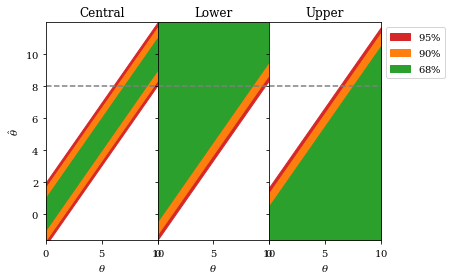

In [12]:
from matplotlib.pyplot import subplots
from numpy import array, linspace

fig, ax = subplots(ncols=3,sharey=True,sharex=True,
                   gridspec_kw=dict(wspace=0))
mus = linspace(0,10,100)

clh = array(list(pclh.values())).T
ps  = array(list(pclh.keys()))
ll  = mus.min()+clh.min()
hh  = mus.max()+clh.max()

for i, chs in enumerate(clh):
    ax[i].set_xlabel(r'$\theta$')
    ax[i].axhline(8,linestyle='--',color='gray')
    for pp,ch,co in zip(ps[::-1],chs[::-1],['tab:red','tab:orange','tab:green']):
        opt = dict(label=fr'${pp*100:2.0f}\%$',color=co)
        
        if i == 0:
            ax[i].fill_between(mus,mus-ch,mus+ch,**opt)
        elif i == 1: 
            ax[i].fill_between(mus,mus+ch,hh,**opt)
        elif i == 2:
            ax[i].fill_between(mus,ll,mus+ch,**opt)
            
ax[0].set_ylabel(r'$\hat\theta$')
ax[0].set_xlim(mus[0],mus[-1])
ax[0].set_ylim(ll,hh)
ax[0].set_title('Central')
ax[1].set_title('Lower')
ax[2].set_title('Upper')
ax[2].legend(bbox_to_anchor=(1,1),loc='upper left');

To evaluate the confidence limits at a particular observed value $\hat\theta$, for example $\hat\theta=8$ as shown in the plot, we can simply evaluate the pre-computed values and add 8 

For at evaluere grænserne for en bestemt observeret værdi $\hat\theta$, for eksempel $\hat\theta=8$ som vist i plottet, kan vi evaluere de forberegnede værdier og ligge 8 til

In [13]:
thetahat=8
for pv, (cc,ll,hh) in pclh.items():
    print(f'p={pv*100:2.0f}% -> '
          f'c={thetahat-cc:4.2f} - {thetahat+cc:4.2f} '
          f'l={ll+thetahat:4.2f} '
          f'h={hh+thetahat:4.2f}')

p=68% -> c=7.01 - 8.99 l=7.53 h=8.47
p=90% -> c=6.36 - 9.64 l=6.72 h=9.28
p=95% -> c=6.04 - 9.96 l=6.36 h=9.64


Alternatively, we can evaluate the confidence levels numerically.  We will do this by evaluating the PDF $f$ over a range of $x$ values for a set of $\theta$ values.  We will then calculate the CDF $F$, and find the appropriate limits.  The limits we find are 

- Lower $p$ limit is given by least $l$ so that $F(l;\theta)>1-p$
- Upper $p$ limis is given by least $h$ so that $F(h;\theta)>p$
- Centre $p$ limits is given by least $c,d$ so that $F(c;\theta)>(1-p)/2$ and $F(d;\theta)>(1+p)/2$ 

Alternativt kan vi evaluere tillidsgrenserne numerisk. Vi vil gøre dette ved at evaluere PDF'en $f$ over en række $x$-værdier for et sæt $\theta$-værdier. Vi beregner derefter CDF'en $F$ og finder de passende grænser. De grænser vi finder, er

- Nedre $p$-grænse er givet med mindste $l$, så $F(l;\theta)>1-p$
- Øvre $p$ grænse gives mindste $h$, så $F(h;\theta)>p$
- Center $p$ grænserne er givet ved mindste $c,d$, så $F(c;\theta)>(1-p)/2$ og $F(d;\theta)>(1+p)/2$

First, we calculate the CDF 

Først beregner vi CDF

In [14]:
from numpy import newaxis
from scipy.stats import norm

xrng  =  linspace(-5,15,200)[:,newaxis]
murng =  linspace(0,10,100)
gcdf  =  norm.pdf(xrng,murng).cumsum(axis=0)
gcdf  /= gcdf.max()

Let us plot the CDF 

Lad os plotte CDF'en

Cumulative density function of a normal distribution as a function of true $\mu=\theta$. 

Kumulativ sandsynlighedsfordeling af en normal fordeling som funktion af sande $\mu=\theta$.

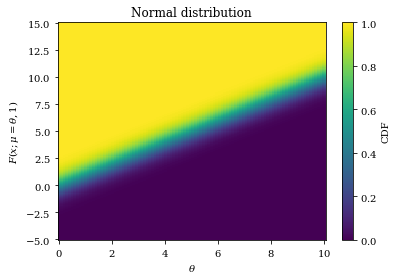

In [15]:
from matplotlib.pyplot import pcolor, colorbar, title, xlabel, ylabel 
from numpy import meshgrid 

pcolor(*meshgrid(murng,xrng),gcdf,shading='auto')
colorbar(label='CDF')
title('Normal distribution')
xlabel(r'$\theta$')
ylabel(r'$F(x;\mu=\theta,1)$');

Next, we define a set of functions to find the limits as outlined above.  Note,the functions `low`,`upp`, also return the constant upper and lower bounds (set by the CDF), respectively.  This is done to streamline the plotting routine below. 

In [16]:
def cdf_cl(x,cdf,p,direction=0):
    from numpy import argmax, ones
    
    def argcl(cdf, lim):
        return argmax(cdf > lim,axis=0)
    
    def xcl(x,cdf,lim):
        return x[argcl(cdf,lim)][:,0]
    
    if isinstance(direction,str):
        m = {'lower': -1, 'low': -1, 'l': -1, 'up':   -1,
             'upper': +1, 'upp': +1, 'u': +1, 'down': +1,
             'high': +1,  'h':   +1,
             'centre': 0, 'center': 0, 'central': 0}
        direction = m.get(direction.lower(),None)
        if direction is None:
            raise ValueError(f'Invalid direction={direction}')
        
    if direction < 0:  # Lower limit 
        return xcl(x,cdf,1-p),x[len(cdf)-1]*ones(cdf.shape[1])

    if direction > 0:  # Upper limit 
        return xcl(x,cdf,p),  x[0]*ones(cdf.shape[1])

    # Central 
    return xcl(x,cdf,(1-p)/2),xcl(x,cdf,(1+p)/2)

We can then define a simple function to plot the limits in three different panels.  This function takes _any_ numerically evaluated CDF and any number of confidence limits and displays these.  Alternatively we can provide a dictionary that maps a probability to a hatching style.  

In [17]:
def plot_cdf_cl(x,theta,cdf,ps,dirs=None,*,fig=None,opt={},sub_kw={},**kwargs):
    from matplotlib.pyplot import subplots,figure 
    
    try:
        len(dirs)
    except:
        dirs = [dirs]
    
    if fig is None:
        fig = figure()
    
    ax  = fig.subplots(ncols=len(dirs),**sub_kw)
    ret = dict(theta=theta)
    for p in ps:
        lbl = fr'${p*100:2.0f}\%$'
        ret[p] = []
        for a,d in zip(ax,dirs):
            l,h = cdf_cl(x,cdf,p,d)
            a.fill_between(theta,l,h,label=lbl,**opt.get(p,{}),
                           **kwargs)
            a.set_title(d)
            a.set_xlabel(r'$\theta$')
            ret[p].append([l,h])
            
    ax[0].set_xlim(theta[0],theta[-1])
    ax[0].set_ylim(theta[0],theta[-1])
    ax[0].set_ylabel(r'$\hat\theta$')
    ax[2].legend(loc='upper left',bbox_to_anchor=(1,1))
    
    return ret

We apply the plotting function to our evaluated CDF for a normal distribution with varying $\mu$. 

Numerically evaluated confidence intervals of a normal distribution. 

Numerisk evaluerede tillidsintervaller for en normal fordeling.

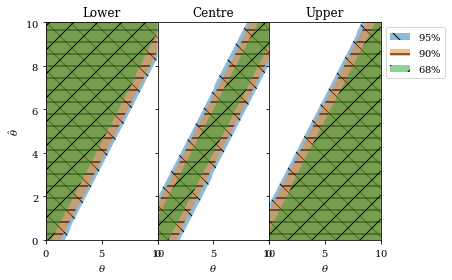

In [18]:
plot_cdf_cl(xrng,murng,gcdf,
            [.95,.9,.68],
            ['Lower','Centre','Upper'],
            opt={.95:{'hatch':'\\'},
                 .9: {'hatch':'-'},
                 .68:{'hatch':'/'}},
            sub_kw=dict(gridspec_kw=dict(wspace=0),
                        sharey=True,sharex=True),
            alpha=.5);

### Example: Poisson Distribution - $\mathcal{P}[\lambda]$

### Eksempel: Poisson Distribution - $\mathcal{P}[\lambda]$

The Poisson distribution is given by _probability mass function_ 

$$ f(n;\lambda) = \frac{\lambda^{n}e^{-\lambda}}{n!}\quad n=\in\mathbb{N}_0\quad,$$ 

which is a _discrete_ probability distribution.  

Poisson-fordelingen gives ved _sandsynlighedsfordelingen_ (eller _sandsynglighedsmassefordelingen_)

$$ f(n;\lambda) = \frac{\lambda^{n}e^{-\lambda}}{n!}\quad n=\in\mathbb{N}_0\quad,$$

hvilket er en _diskret_ sandsynlighedsfordeling.

In [19]:
from sympy import factorial, Function

lamb, n, k = symbols('lambda n k',integer=True,nonnegative=True)
p          = symbols('p',real=True,nonnegative=True)
f          = lamb**n * syexp(-lamb) / factorial(n)
Eq(Function('f')(n,lamb),f)

Eq(f(n, lambda), lambda**n*exp(-lambda)/factorial(n))

It is easy to see that the cumulative distribution function (CDF) is given by 

Det er let at se, at den kumulative sandsynlighedsfordelinger (CDF) er givet ved

In [20]:
from sympy import Sum 

F = syexp(-lamb)*Sum(lamb**k/factorial(k),(k,0,n))
Eq(Eq(Function('F')(n,lamb),F),F.doit().simplify(),evaluate=False)

Eq(Eq(F(n, lambda), exp(-lambda)*Sum(lambda**k/factorial(k), (k, 0, n))), 1 - lowergamma(n + 1, lambda)/factorial(n))

Here, $\gamma$ is the lower [incomplete $\Gamma$ function](https://en.wikipedia.org/wiki/Incomplete_gamma_function) given by 

$$\gamma(n,\lambda)=\int_{0}^{\lambda}dt\,t^{n-1}\,\mathrm {e} ^{-t}\quad.$$

Her er $\gamma$ den nedre [ufuldstændige $\Gamma$-funktion](https://en.wikipedia.org/wiki/Incomplete_gamma_funktion) givet ved

$$\gamma(n,\lambda)=\int_{0}^{\lambda}dt\,t^{n-1}\,\mathrm {e} ^{-t}\quad.$$

There is unfortunately no ready solution for 

$$F(n;\gamma) = p\quad,$$ 

so we cannot invert it as we did for the normal distribution above.  Thus, we will evaluate the confidence limits numerically.  Luckily, we've already done half the work - all we need to do is to evaluate the CDf over some values of $n$ and $\lambda$

Der er desværre ingen klar løsning til

$$F(n;\gamma) = p\quad,$$

så vi kan ikke invertere det, som vi gjorde for normal fordelingen ovenover. Derfor vil vi evaluere tillidsgrænserne numerisk. Heldigvis har vi allerede gjort halvdelen af arbejdet - alt hvad vi skal gøre er at evaluere CDf over nogle værdier af $n$ og $\lambda$

In [21]:
from scipy.stats import poisson

nrng = linspace(0,30,31)[:,newaxis]
lrng = linspace(0,15,301)
pcdf = poisson.cdf(nrng,lrng)

CDF of a Poisson distribution for various values of $\lambda$. 

CDF af en Poisson-fordeling for forskellige værdier af $\lambda$.

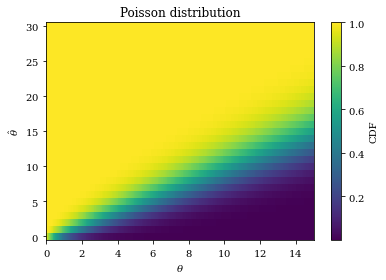

In [22]:
pcolor(*meshgrid(lrng,nrng),pcdf,shading='auto')
colorbar(label='CDF')
title('Poisson distribution')
xlabel(r'$\theta$')
ylabel(r'$\hat\theta$');

We can use the function defined above to plot our confidence bands 

Vi kan bruge den ovenfor definerede funktion til at plotte vores tillidsbånd

Confidence intervals of a Poisson distribution as a function of the true parameter $\theta=\lambda$. 

Tillidsintervaller for en Poisson-distribution som en funktion af den sande parameter $\theta=\lambda$.

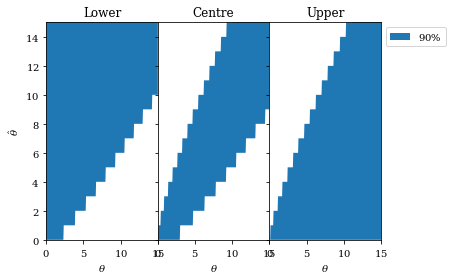

In [23]:
cl = plot_cdf_cl(nrng,lrng,pcdf,[.9],['Lower','Centre','Upper'],
                 sub_kw=dict(gridspec_kw=dict(wspace=0),
                             sharex=True,sharey=True))

Let us evaluate this for $\hat\theta=\hat\lambda=8$.

Lad os evaluere dette for  $\hat\theta=\hat\lambda=8$.

In [24]:
from numpy import where
pch  = lrng[where(cl[0.9][1][0]==8)][0]
pcl  = lrng[where(cl[0.9][1][1]==8)][-1]
pup  = lrng[where(cl[0.9][2][0]==8)][0]
plo  = lrng[where(cl[0.9][0][0]==8)][-1]
print(f'Central 90% C.L.: {pcl:5.1f}-{pch:5.1f}\n'
      f'Lower   90% C.L.: {plo:5.1f}\n'
      f'Upper   90% C.L.: {pup:5.1f}') 

Central 90% C.L.:   4.7- 13.2
Lower   90% C.L.:  13.0
Upper   90% C.L.:   4.7


## Feldman-Cousines 

The [Feldman-Cousines method](https://arxiv.org/abs/physics/9711021) for estimating confidence limits takes a somewhat different approach to issue.  The method is summarised below.  

- Suppose we have a PDF $f$ of some observable with the proposed parameter $\theta$ 

  $$f(x;\theta)\quad.$$ 

- Given the measurement $x$, we can construct the likelihood of that measurement given $f$ and $\theta$ 

  $$\mathcal{L}(x,\theta) = f(x;\theta)\quad$$ 

- We know want to know, what is the confidence _limits_ $(l,h)$ we should quote for a particular confidence _level_  $(p)$.  The idea is then to evaluate - for all possible values of $y_i=x$ (given $\theta)$, the most likely $\hat\theta$, i.e., to maximize 

  $$\mathcal{L}(y_i,\hat\theta) = f(y_i;\hat\theta)\quad,$$  

  and to calculate the likelihood of the hypothesis $\theta$ 

  $$\mathcal{L}(y_i,\theta) = f(y_i;\theta)\quad.$$

- For each possible $y$, we form the likelihood ratio - called the _rank_ in this method 

  $$R(y_i) = \frac{\mathcal{L}(y_i;\theta)}{\mathcal{L}(y_i;\hat\theta)}\quad,$$ 

  and order $y_i$ in decreasing value of $R(y_i)$.  We then include the smallest set $s=\{y_i|y_i\ \mathrm{ranked}\}$ such that  

  $$\sum_{y_i\in s} \mathcal{L}(y_i,\theta) = \sum_{y_i\in s}f(y_i;\theta) \ge p\quad.$$

- The confidence interval is then 

  $$[\min s, \max s]\quad.$$

## Feldman-Cousines

[Feldman-Cousines](https://arxiv.org/abs/physics/9711021) metoden til beregning af tillidsgrænser tager en noget anden tilgang end ovenover. Algoritmen opsummeres nedenunder.

- Antag, at vi har en PDF-$f$ af nogle observerbare med den foreslåede parameter $\theta$

  $$f(x;\theta)\quad.$$

- Givet måling $x$, kan vi konstruere sandsynligheden for målingen givet $f$ og $\theta$

  $$\mathcal{L}(x,\theta) = f(x;\theta)\quad$$

- Vi ved vil gerne vide, hvad tillids _grænserne_ $(l,h)$ er, ved et bestemt niveau $(p)$.  Ideen er derefter at evaluere - for alle mulige værdier af $y_i=x$ (givet $\theta)$, den mest sandsynlige $\hat\theta$, dvs. at maksimere

  $$\mathcal{L}(y_i,\hat\theta) = f(y_i;\hat\theta)\quad,$$

  og at beregne sandsynligheden for hypotesen $\theta$

  $$\mathcal{L}(y_i,\theta) = f(y_i;\theta)\quad.$$

- For hver mulig $y$ danner vi sandsynlighedsforholdet - kaldet _rang_ i denne metode

  $$R(y_i) = \frac{\mathcal{L}(y_i;\theta)}{\mathcal{L}(y_i;\hat\theta)}\quad,$$

  og ordner $y_i$ i aftagende værdi af $R(y_i)$. Vi inkluderer derefter det mindste sæt $s=\{y_i|y_i\ \mathrm{ranked}\}$ sådan at

  $$\sum_{y_i\in s} \mathcal{L}(y_i,\theta) = \sum_{y_i\in s}f(y_i;\theta) \ge p\quad.$$

- Tillidsgrænserne er derefter

  $$[\min s, \max s]\quad.$$

First, we make a function that calculates the rank $R(y_i)$ given 

- the PDF $f$
- the measurements $y_i$ 
- the hypothesis value(s) $\theta$ 
- the best estimator value $\hat\theta$ 

The function then returns the 3-tuple for each hypothesized $\theta$ value and measurement $y_i$

$$\mathcal{L}(y_i,\theta),R(y_i),y_i\quad.$$ 

Først laver vi en funktion, der beregner rangen $R(y_i)$ givet

- PDF $f$
- målingerne $y_i$
- hypotesen værdi (r) $\theta$
- den bedste estimatorværdi $\hat\theta$

Funktionen returnerer derefter tripletter for hver hypotetiseret $\theta$-værdi og målte $y_i$

$$\mathcal{L}(y_i,\theta),R(y_i),y_i\quad.$$

In [25]:
def fc_rank(pdf,measurement,hypothesis,best):
    from numpy import array, tile
    lhyp = pdf(measurement,hypothesis)
    lopt = pdf(measurement,best)
    r    = lhyp / lopt
    return array((lhyp, r, tile(measurement,r.shape[1]))).T

This function will be repeatedly evaluated for _all_ possible values of $y_i$ for a given hypothesis $\theta$.  Note, in general the best estimator $\hat\theta$ is a function of $y_i$, and we do not assume any particular form here.  

Next up, we code a function that takes a list of the three-tuples 

$$\mathcal{L}(y_i,\theta),R(y_i),y_i\quad,$$ 

as returned by the above, sorts them (indirectly) in descending order of $R(y_i)$, and forms the cumulative of $\mathcal{L}(y_i,\theta)$.  We then pick out the $y_i$ values of the sorted list for which the cumulative sum is smaller than or equal to the desired confidence level $p$.  The least and largest values of $y_i$ are then returned.  

Denne funktion evalueres gentagne gange for _alle_ mulige værdier af $y_i$ for en given hypotese $\theta$. Bemærk, at den bedste estimator $\hat\theta$ generelt er en funktion af $y_i$, og vi antager ikke nogen særlig form her.

Herefter koder vi en funktion, der tager en liste over tripletterne

$$\mathcal{L}(y_i,\theta),R(y_i),y_i\quad,$$

som returneret af funktionen ovenover, sorterer dem (indirekte) i aftagende værdi af $R(y_i)$ og danner den kumulative $\mathcal{L}(y_i,\theta)$. Vi vælger derefter $y_i$-værdierne i den sorterede liste, hvor den kumulative sum er mindre end eller lig med det ønskede konfidensniveau $p$. De mindst og største værdier af $y_i$ returneres derefter.

In [26]:
def fc_cl(ranked,p,fuzzy=0):
    from numpy import array, cumsum, where, nan, nanmin, nanmax,errstate, vstack
    
    srt = ranked.argsort(axis=1)[:,::-1,1]
    id1 = array([range(len(srt))]*len(srt[0])).T
    cms = cumsum(ranked[id1,srt,0],axis=1)
    inc = where(cms<=(p+fuzzy),ranked[id1,srt,2],nan)
    
    with errstate(all='ignore'):
        mim = nanmin(inc,axis=1)
        mam = nanmax(inc,axis=1)
    
    return vstack((mim,mam)).T

### Example: Poisson distribution again 

Now, let us apply this to a Poisson distribution with a known background of 3.  Thus, our pmf becomes 

$$f(n,\lambda) = \frac{\lambda^{n+3}e^{-\lambda}}{(n+3)!}\quad n=\in\mathbb{N}_0\quad,$$ 


The estimator given the observation $n$ is simply $n$, so we pass that in for the best fit value.  

Note, we pass `n` as a two-dimensional object so that the _NumPy_ broadcasting rules ensures that we get as many limits back as we have input $\lambda$ values (20 here). 

### Eksempel: Poisson fordelingen igen 

Lad os nu anvende på til en Poisson-fordeling med en kendt baggrund på 3. Således bliver vores pmf

$$f(n,\lambda) = \frac{\lambda^{n+3}e^{-\lambda}}{(n+3)!}\quad n=\in\mathbb{N}_0\quad,$$

Estimatoren, der gives observationen $n$, er $n$, så vi giver det som den bedst egnede værdi.

Bemærk, vi videregiver `n` som et todimensionalt objekt, så _NumPy_-transmissionsreglerne sikrer, at vi får så mange grænser tilbage, som vi har input-$\lambda$-værdier (20 her).

Confidence intervals for a Poisson distribution with a background of $3$, evaluated using the Feldman-Cousine algorithm.  Note, for $\hat\lambda=8$ we find the interval $[6,15]$ at $90\%$ C.L.

Tillidsintervaller for en Poisson fordeling med en baggrund på $3$, evalueret ved hjælp af Feldman-Cousine-algoritmen. Bemærk, for $\hat\lambda=8$ finder vi intervallet $[6,15]$ ved $90\%$ C.L.

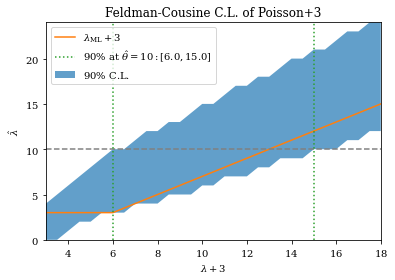

In [27]:
from numpy import maximum, argmax
from matplotlib.pyplot import grid, fill_between, plot, \
    axhline, axvline, xlim, ylim, legend

f    = poisson.pmf 
n    = linspace(0,24,25)[:,newaxis]
lamb = linspace(3,18,int((18-3)//0.5+1))
est  = maximum(0,n-3)+3
r    = fc_rank(f,n,lamb,est)
cl   = fc_cl(r,.90,0.0)

fill_between(lamb,cl[:,0],cl[:,1],alpha=.7,
             label=r'$90\%$ C.L.')
plot(lamb[::2],est[:16,0],color='C1',
     label=r'$\lambda_{\mathrm{ML}}+3$')
axhline(10,ls='--',color='gray')
    
l10 = lamb[argmax(cl[:,1]==10)]
h10 = lamb[argmax(cl[:,0]==10)]
axvline(l10,ls=':',color='C2',
        label=fr'$90\%$ at $\hat\theta=10: [{l10},{h10}]$')
axvline(h10,ls=':',color='C2')
    
xlabel(r'$\lambda+3$')
ylabel(r'$\hat\lambda$')
xlim(lamb[0],lamb[-1])
ylim(n[0],n[-1])
title('Feldman-Cousine C.L. of Poisson+3')
legend(loc='upper left');

## Summary

Vi have defined what we mean by _confidence interval_, and we have seen how we can calculate that from a normal distribution analytically.  We have seen that $\pm 1\sigma$ around the mean is the confidence interval at $68\%$ confidence level, and $\pm 2\sigma$ is for $95\%$ C.L.. 

We have developed numerical methods to estimate the confidence interval for a given PDF - both by brute force evaluation of the CDF and via the Feldman-Cousine algorithm. 

## Resumé

Vi har defineret, hvad vi mener med _tillidsinterval_, og vi har set, hvordan vi kan beregne det for en normal distribution analytisk. Vi har set, at $\pm 1\sigma$ omkring middelværdien er tillidsintervallet ved $68\%$-tillidsniveau, og $\pm 2\sigma$ er for $95\%$ C.L..

Vi har udviklet numeriske metoder til at estimere tillidsintervallet for en given PDF - både ved evaluering af CDF'en og via Feldman-Cousine algoritmen.

In [28]:
cdf_cl.__doc__ = \
"""Evaluate the confince interval from an evaluated CDF 

Parameters
---------- 
x : array-like 
    Where the CDF is evaluted 
cdf : array-like 
    The evaluted CDF 
p : float 
    Confidence levet to evaluate at 
direction : int, str 
    Direction of the confidene interval  
    
    -1, 'Lower': Lower bound 
    +1, 'Upper': Upper bound 
    0, 'Centre': Around centre 
    
Returns
------- 
l, h: (array-like,array-like)
    Lower and upper confidence bounds at confidence level p evaluated at x 
"""

In [29]:
plot_cdf_cl.__doc__ = "Plots Confidence intervals of a CDF"

In [30]:
fc_rank.__doc__ = \
"""Calculates Feldman-Cousine rank of PDF with measurements, hypotheses, and best value 

Parameters
----------
f : callable 
    PDF 
measurement : array-like 
    Measurements 
hypothesis : array-like 
    Suggested theta 
best : array-like 
    Best-fit theta values 
    
Returns
------- 
rows : array of 3-tuple 

    likelihood : float 
    rank : float 
    measurement : float
"""

In [31]:
fc_cl.__doc__ = \
"""Estimate the confidence interval given using the Feldman-Cousine algorithm 

Parameters
----------
ranked : array-like of three-tuples 
    The rank calculated by fc_rank 
p : float 
    Requested confidence level
fuzzy : float (optional)
    Fuzzyness of comparisons
Returns
-------
l, h : array-like 
    confidence intervals where the CDF is evaluated. 

"""